# Demonstrate the use of the Elbow Curve method in portfolio management 

1. Choose any SA Equity portfolio - we'll use the Bateleur BCI SA Equity (A1) & Excelsia SA 27four Equity Fund
2. The objecive is to find the optimal number of assets that this portfolio can hold. 

# Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import warnings
import yfinance as yf

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.options.display.precision = 4
# plt.style.use('seaborn-ticks')

# Download the data

In [2]:
# Date range
start = '2024-01-01'
end = '2024-12-31'

# Tickers of assets
asset_classes = pd.read_csv("asset_classes52.csv").sort_values(by = ["Assets"])

# first - will the column headers drop the other two columns
# asset_classes.dropna('industry', inplace = True)


assets = list(asset_classes["Assets"])

# market_index = ['^J433.JO']

all_assets = assets 
all_assets.sort()

# Downloading data
data = yf.download(all_assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = all_assets

[*********************100%***********************]  50 of 50 completed


# Calculate the returns

In [3]:
# Calculating returns

Y = data[all_assets].pct_change().dropna()

display(Y.head())

,ABG.JO,AEG.JO,AMS.JO,ANG.JO,APN.JO,ARI.JO,ARL.JO,ASC.JO,BAT.JO,BTI.JO,...,REN.JO,SAP.JO,SOL.JO,SPG.JO,SPP.JO,SSW.JO,SUR.JO,TFG.JO,TKG.JO,TRU.JO
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-27 00:00:00+00:00,-0.0134,0.0085,0.0006,0.0182,0.0038,0.0050,-0.0143,-0.0370,-0.0336,-0.0088,...,0.0000,-0.0184,-0.0122,0.0021,-0.0086,0.0130,0.0000,-0.0083,-0.0273,-0.0153
2024-05-28 00:00:00+00:00,-0.0009,-0.0050,-0.0726,-0.0066,0.0236,-0.0081,-0.0128,0.0000,-0.0087,0.0012,...,0.0000,0.0032,-0.0344,-0.0153,0.0255,-0.0100,-0.0003,0.0094,-0.0183,0.0137
2024-05-30 00:00:00+00:00,-0.0351,-0.0034,-0.0503,0.0114,-0.0013,-0.0124,0.0105,0.0128,0.0088,0.0140,...,-0.0184,-0.0213,-0.0154,-0.0185,-0.0180,-0.0025,-0.0030,-0.0695,-0.0286,-0.0600
2024-05-31 00:00:00+00:00,0.0119,0.0000,-0.0347,-0.0256,0.0005,-0.0026,-0.0734,0.0000,0.0000,0.0233,...,0.0187,-0.0269,0.0049,-0.0004,0.0241,-0.0084,-0.0017,-0.0136,0.0128,-0.0063
2024-06-03 00:00:00+00:00,0.0387,0.0288,-0.0097,0.0011,0.0032,-0.0017,0.0719,0.0000,-0.1739,-0.0060,...,-0.0010,-0.0032,-0.0653,0.0218,0.0037,-0.0169,0.0017,0.0084,-0.0059,0.0347


# Calculate the standard deviation (as a rsik measure) and compute the expected risks.

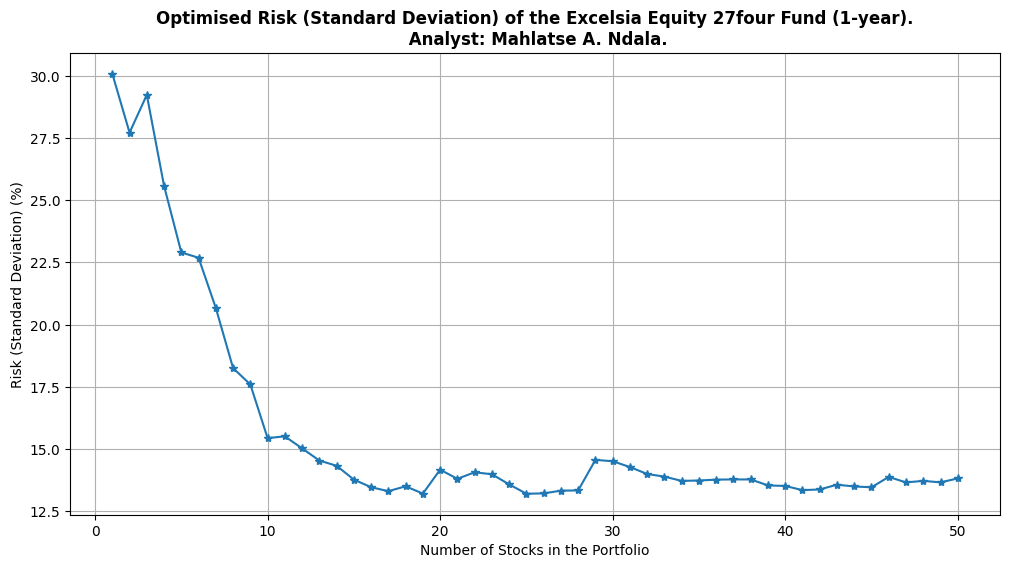

1     30.079
2     27.713
3     29.229
4     25.573
5     22.901
6     22.686
7     20.669
8     18.255
9     17.598
10    15.443
11    15.512
12    15.030
13    14.540
14    14.331
15    13.775
16    13.469
17    13.311
18    13.506
19    13.214
20    14.174
21    13.807
22    14.069
23    13.990
24    13.584
25    13.208
26    13.221
27    13.331
28    13.340
29    14.567
30    14.513
31    14.280
32    14.000
33    13.895
34    13.723
35    13.739
36    13.774
37    13.782
38    13.781
39    13.542
40    13.519
dtype: float64

In [6]:
import matplotlib.pyplot as plt

def calculate_stdev_different_portfolios(data):

    """
    Calculate standard deviation for portfolios with increasing numbers of shares and visualize the results.

    Args:
    shares_symbols (list): A list of shares symbols

    Returns:
    Series: Series containing the standard deviation for portfolios with increasing numbers of shares.
    """

    # Dictionary to hold expected standard deviation of portfolios
    sd = {}

    # Define number of shares in each portfolio
    number_of_shares = np.arange(1, len(Y.columns)+1)

    # Iterate through each portfolio
    for num_shares in number_of_shares:
        # Create equal weights for each constituent in the data
        weights = np.full(num_shares, 1/num_shares)

        # Extract data from whole dataset
        shares_data_subset = Y.iloc[:, :num_shares]

        # Create covariance matrix
        cov_mat = shares_data_subset.cov()

        # Calculate annual covariance matrix
        cov_mat = cov_mat * 252

        # Calculate expected portfolio volatility
        expected_portfolio_variance = weights.T.dot(cov_mat).dot(weights)
        expected_portfolio_std_dev = np.sqrt(expected_portfolio_variance)

        # Store in dictionary
        sd[num_shares] = round(expected_portfolio_std_dev * 100, 3)

    std_dev_of_different_portfolios = pd.Series(sd)

    # Plot standard deviations
    plt.figure(figsize=(12, 6))
    plt.plot(std_dev_of_different_portfolios.index, std_dev_of_different_portfolios.values, marker='*', linestyle='-')
    plt.title('Optimised Risk (Standard Deviation) of the Excelsia Equity 27four Fund (1-year).\n Analyst: Mahlatse A. Ndala.', fontweight='bold')
    plt.xlabel('Number of Stocks in the Portfolio')
    plt.ylabel('Risk (Standard Deviation) (%)')
    plt.grid(True)
    plt.show()

    return std_dev_of_different_portfolios[:40]

#checking the elbow curve
elbow_curve = calculate_stdev_different_portfolios(data)
elbow_curve